Summary Statistics by Version:

        Understood_use           Intuitive_use           Found_useful           Enjoyed_using           Buttons_explanatory          
                  mean       std          mean       std         mean       std          mean       std                mean       std
Version                                                                                                                              
A             5.625000  2.065879           5.5  2.138090     5.250000  2.121320      4.875000  2.031010            4.500000  2.329929
B             6.285714  1.253566           6.0  0.816497     5.857143  1.676163      5.714286  1.380131            5.714286  1.799471 

T-test Results:
Question                  t-statistic     p-value        
-------------------------------------------------------
Understood_use            -0.73           0.4759         
Intuitive_use             -0.58           0.5715         
Found_useful              -0.61           0.5535  

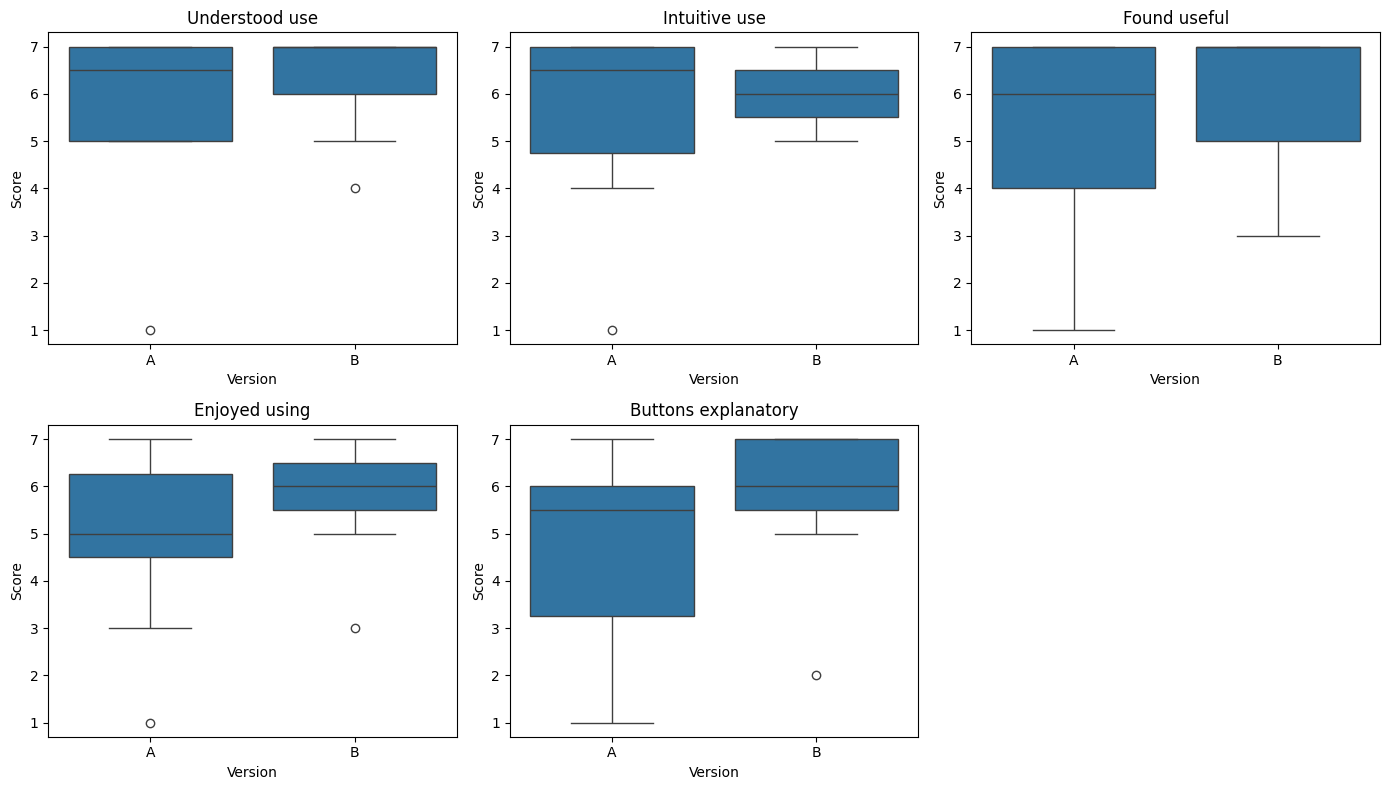

In [9]:
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# Load data for both versions
data_a = pd.read_excel('C:\\Users\\mkels\\Downloads\\Documents\\AB-test_Version A.xlsx', sheet_name='Sheet1')
data_b = pd.read_excel('C:\\Users\\mkels\\Downloads\\Documents\\AB-Test_Version B.xlsx', sheet_name='Sheet1')

# Add a column to indicate the version
data_a['Version'] = 'A'
data_b['Version'] = 'B'

# Combine both dataframes
data = pd.concat([data_a, data_b], ignore_index=True)

# Rename columns for simplicity
data.columns = [
    'Id', 'Start_time', 'Completion_time', 'Email', 'Name',
    'Understood_use', 'Intuitive_use', 'Found_useful', 'Enjoyed_using', 'Buttons_explanatory', 'Version'
]

# Select only numerical columns for analysis
numerical_columns = ['Understood_use', 'Intuitive_use', 'Found_useful', 'Enjoyed_using', 'Buttons_explanatory']

# Calculate mean and standard deviation for each question by version
summary = data.groupby('Version')[numerical_columns].agg(['mean', 'std'])

# Perform t-tests for each question and store results in a list
t_test_results = []
for question in numerical_columns:
    scores_a = data[data['Version'] == 'A'][question]
    scores_b = data[data['Version'] == 'B'][question]
    t_stat, p_value = ttest_ind(scores_a, scores_b)
    t_test_results.append((question, t_stat, p_value))

# Print tabular results for mean and std
print("Summary Statistics by Version:\n")
print(summary.to_string(), "\n")

# Print t-test results in a formatted way
print("T-test Results:")
print(f"{'Question':<25} {'t-statistic':<15} {'p-value':<15}")
print("-" * 55)
for question, t_stat, p_value in t_test_results:
    print(f"{question:<25} {t_stat:<15.2f} {p_value:<15.4f}")

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Create a boxplot for each question
for i, question in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Version', y=question, data=data)
    plt.title(question.replace('_', ' '))
    plt.xlabel('Version')
    plt.ylabel('Score')

plt.tight_layout()
plt.show()
